In [357]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Read Data

In [358]:
df_train = pd.read_csv("../datasets/train.csv")
df_test = pd.read_csv("../datasets/test.csv")

# รวมข้อมูล
df = pd.concat([df_train, df_test], ignore_index=True)
df_copy = df.copy()
df_copy.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Understanding Data

In [359]:
df_copy.keys()

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [360]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [361]:
df_copy.describe().round(2)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,44158.70,64940.50,39.43,1190.32,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
std,31207.38,37493.27,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
min,0.00,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,16234.75,32470.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,38963.50,64940.50,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,71433.25,97410.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,103903.00,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [362]:
df_copy.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [363]:
df_copy_cleaned = df_copy.dropna()
df_copy_cleaned=df_copy_cleaned.drop(['Unnamed: 0','id'],axis=1).reset_index(drop=True)
df_copy_cleaned


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129483,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129484,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129485,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [364]:
df_copy_cleaned.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [365]:
df_copy_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129487 non-null  object 
 1   Customer Type                      129487 non-null  object 
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  object 
 4   Class                              129487 non-null  object 
 5   Flight Distance                    129487 non-null  int64  
 6   Inflight wifi service              129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Ease of Online booking             129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Food and drink                     129487 non-null  int64  
 11  Online boarding                    1294

## OneHotEncoder

In [366]:
encoded_need=[]
for i in df_copy_cleaned.columns:
  if df_copy_cleaned[i].dtype=='object':
    print(f"Unique values of '{i}' is {df_copy_cleaned[i].unique()}")
    encoded_need.append(i)
print("Categorical values exist in the columns : ",encoded_need)
print(encoded_need[:-1])

Unique values of 'Gender' is ['Male' 'Female']
Unique values of 'Customer Type' is ['Loyal Customer' 'disloyal Customer']
Unique values of 'Type of Travel' is ['Personal Travel' 'Business travel']
Unique values of 'Class' is ['Eco Plus' 'Business' 'Eco']
Unique values of 'satisfaction' is ['neutral or dissatisfied' 'satisfied']
Categorical values exist in the columns :  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
['Gender', 'Customer Type', 'Type of Travel', 'Class']


In [367]:
df_copy_cleaned.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [368]:
max_values = df_copy_cleaned.max()

# หาคอลัมน์ที่มีค่า max = 5
columns_with_max_5 = max_values[max_values == 5].index.tolist()

print("คอลัมน์ที่มีค่า max เท่ากับ 5:", columns_with_max_5)
encoded_all = columns_with_max_5 + encoded_need[:-1]
print(encoded_all)

คอลัมน์ที่มีค่า max เท่ากับ 5: ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Gender', 'Customer Type', 'Type of Travel', 'Class']


In [369]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(df_copy_cleaned[encoded_all])

df_encoded = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(encoded_all))
df_encoded = df_encoded.astype(int)
df_encoded

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Cleanliness_5,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,1,0,1,0,0
2,0,0,1,0,0,0,0,0,1,0,...,1,1,0,1,0,1,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,1,1,0,1,0,0
129483,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
129484,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
129485,0,0,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,0,1,0,0


In [370]:
df_drop_dummy = df_copy_cleaned.drop(encoded_all, axis=1)
df_drop_dummy


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,13,460,25,18.0,neutral or dissatisfied
1,25,235,1,6.0,neutral or dissatisfied
2,26,1142,0,0.0,satisfied
3,25,562,11,9.0,neutral or dissatisfied
4,61,214,0,0.0,satisfied
...,...,...,...,...,...
129482,34,526,0,0.0,neutral or dissatisfied
129483,23,646,0,0.0,satisfied
129484,17,828,0,0.0,neutral or dissatisfied
129485,14,1127,0,0.0,satisfied


In [371]:
df_drop_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129487 entries, 0 to 129486
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         129487 non-null  int64  
 1   Flight Distance             129487 non-null  int64  
 2   Departure Delay in Minutes  129487 non-null  int64  
 3   Arrival Delay in Minutes    129487 non-null  float64
 4   satisfaction                129487 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.9+ MB


In [372]:
# ตรวจสอบขนาดของ df_drop_dummy และ df_encoded ก่อน
print("ขนาดของ df_drop_dummy:", df_drop_dummy.shape)
print("ขนาดของ df_encoded:", df_encoded.shape)

df_final = pd.concat([df_encoded, df_drop_dummy], axis=1)
print("ขนาดของ df_final:", df_final.shape)


ขนาดของ df_drop_dummy: (129487, 5)
ขนาดของ df_encoded: (129487, 92)
ขนาดของ df_final: (129487, 97)


In [373]:
df_final

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,13,460,25,18.0,neutral or dissatisfied
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,25,235,1,6.0,neutral or dissatisfied
2,0,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,26,1142,0,0.0,satisfied
3,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,25,562,11,9.0,neutral or dissatisfied
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,61,214,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,34,526,0,0.0,neutral or dissatisfied
129483,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,23,646,0,0.0,satisfied
129484,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,17,828,0,0.0,neutral or dissatisfied
129485,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,14,1127,0,0.0,satisfied


In [374]:
# sns.pairplot(df_final)

## Train-Test Splitting

In [375]:
X=df_final.iloc[:,:-1]
X

,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_0,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,...,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,13,460,25,18.0
1,0,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,25,235,1,6.0
2,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,26,1142,0,0.0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,25,562,11,9.0
4,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,61,214,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,0,0,0,1,0,0,0,0,0,1,...,1,1,0,1,0,0,34,526,0,0.0
129483,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,23,646,0,0.0
129484,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,17,828,0,0.0
129485,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,14,1127,0,0.0


In [376]:
y = df_final.iloc[:,-1]
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
129482    neutral or dissatisfied
129483                  satisfied
129484    neutral or dissatisfied
129485                  satisfied
129486    neutral or dissatisfied
Name: satisfaction, Length: 129487, dtype: object

In [377]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"Shape of training set is : {X_train.shape} and test set is :{X_test.shape}" )

Shape of training set is : (103589, 96) and test set is :(25898, 96)


In [378]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Logistic Regression

In [379]:
from sklearn.linear_model import LogisticRegression

# create logistic regression model and fit to training data
model_lr = LogisticRegression()

start_time = time.time()  # เวลาเริ่มต้น
model_lr.fit(X_train, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_LR = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")

เวลาที่ใช้ในการฝึกโมเดล: 0.356435 วินาที


In [380]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_lr=model_lr.predict(X_test)
accuracy_LR=accuracy_score(y_pred_lr,y_test)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")

report=classification_report(y_test,y_pred_lr)
print("Classification Report is : \n",report)

Accuracy of Logistic Regression is : 93.2 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.95      0.94     14668
              satisfied       0.93      0.91      0.92     11230

               accuracy                           0.93     25898
              macro avg       0.93      0.93      0.93     25898
           weighted avg       0.93      0.93      0.93     25898



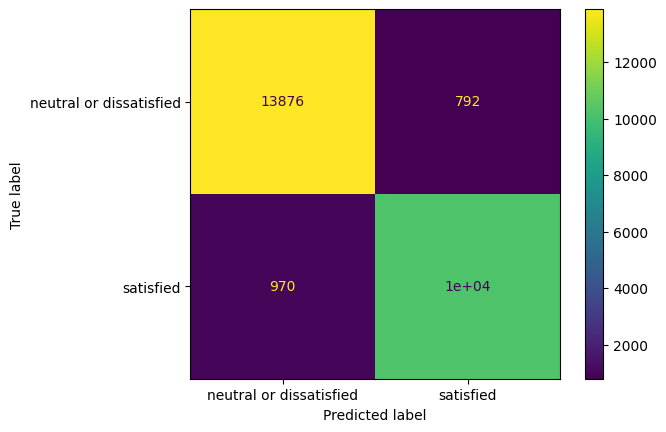

In [381]:
cm_1= confusion_matrix(y_test, y_pred_lr, labels=model_lr.classes_)
disp_1= ConfusionMatrixDisplay(confusion_matrix=cm_1,
                          display_labels=model_lr.classes_)
disp_1.plot()

## K-NN(K Nearest Neighbours)

In [382]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=5)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_knn.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_KNN = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.086035 วินาที


In [383]:

#Predict the accuracy of the model
y_pred_knn=model_knn.predict(X_test)

accuracy_KNN=accuracy_score(y_pred_knn,y_test)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")

report=classification_report(y_test,y_pred_knn)
print("Classification Report is : \n",report)

Accuracy of Knn is : 94.3 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     14668
              satisfied       0.94      0.92      0.93     11230

               accuracy                           0.94     25898
              macro avg       0.94      0.94      0.94     25898
           weighted avg       0.94      0.94      0.94     25898



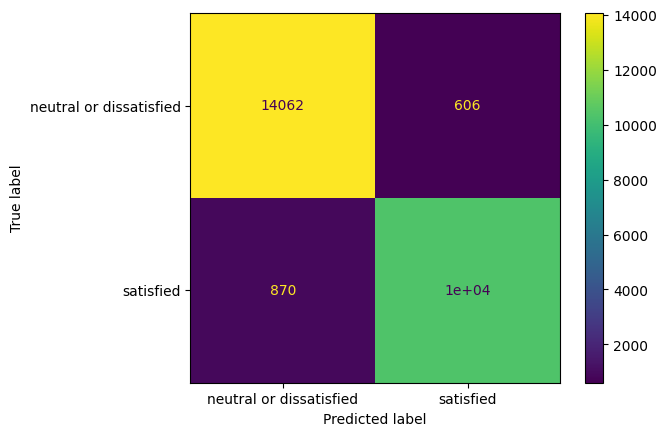

In [384]:
cm_2= confusion_matrix(y_test, y_pred_knn, labels=model_lr.classes_)
disp_2= ConfusionMatrixDisplay(confusion_matrix=cm_2,
                          display_labels=model_knn.classes_)
disp_2.plot()

## Naive-Bayes

In [385]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# ใช้ MinMaxScaler แปลง X_train ให้อยู่ในช่วง 0 ถึง 1
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ฟิตโมเดลด้วยข้อมูลที่ถูกแปลงแล้ว
model_naive = MultinomialNB()

start_time = time.time()  # เวลาเริ่มต้น
model_naive.fit(X_train_scaled, y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_NB = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")


เวลาที่ใช้ในการฝึกโมเดล: 0.200725 วินาที


In [386]:

#Predict the accuracy of the model
y_pred_naive=model_naive.predict(X_test_scaled)

accuracy_NB=accuracy_score(y_pred_naive,y_test)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")

report=classification_report(y_test,y_pred_naive)
print("Classification Report is : \n",report)

Accuracy of Naive Bayes is : 88.34 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.89      0.90     14668
              satisfied       0.86      0.87      0.87     11230

               accuracy                           0.88     25898
              macro avg       0.88      0.88      0.88     25898
           weighted avg       0.88      0.88      0.88     25898



## Decision Tree

In [387]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='gini', splitter='best',max_features=6,random_state=1234)

#fit the model with trained data
start_time = time.time()  # เวลาเริ่มต้น
model_dt.fit(X_train,y_train)
end_time = time.time()  # เวลาสิ้นสุด

# คำนวณเวลาที่ใช้ในการฝึกโมเดล
training_time_DT = end_time - start_time
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")



เวลาที่ใช้ในการฝึกโมเดล: 0.199176 วินาที


In [388]:

#Predict the accuracy of the model
y_pred_dt=model_dt.predict(X_test)

accuracy_DT=accuracy_score(y_pred_dt,y_test)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")

report=classification_report(y_test,y_pred_dt)
print("Classification Report is : \n",report)

Accuracy of Decision Tree is : 91.97 % .
Classification Report is : 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.93      0.93     14668
              satisfied       0.91      0.91      0.91     11230

               accuracy                           0.92     25898
              macro avg       0.92      0.92      0.92     25898
           weighted avg       0.92      0.92      0.92     25898



## สรูป

In [389]:
print("-"*30,"สรูป","-"*30)

print("-"*65)
print(f"Accuracy of Logistic Regression is : {round(accuracy_LR*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_LR:.6f} วินาที")

print("-"*65)
print(f"Accuracy of Knn is : {round(accuracy_KNN*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_KNN:.6f} วินาที")

print("-"*65)
print(f"Accuracy of Naive Bayes is : {round(accuracy_NB*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_NB:.6f} วินาที")

print("-"*65)
print(f"Accuracy of Decision Tree is : {round(accuracy_DT*100,2)} % .")
print(f"เวลาที่ใช้ในการฝึกโมเดล: {training_time_DT:.6f} วินาที")


------------------------------ สรูป ------------------------------
-----------------------------------------------------------------
Accuracy of Logistic Regression is : 93.2 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.356435 วินาที
-----------------------------------------------------------------
Accuracy of Knn is : 94.3 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.086035 วินาที
-----------------------------------------------------------------
Accuracy of Naive Bayes is : 88.34 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.200725 วินาที
-----------------------------------------------------------------
Accuracy of Decision Tree is : 91.97 % .
เวลาที่ใช้ในการฝึกโมเดล: 0.199176 วินาที
